In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
without_tasks_df = pd.read_csv('./inference/utilization_lstm_model_without_tasks_inference.csv', index_col=0)
with_tasks_df = pd.read_csv('./inference/utilization_lstm_model_with_tasks_inference.csv', index_col=0)
with_instances_df = pd.read_csv('./inference/utilization_lstm_model_with_instances_inference.csv', index_col=0)
with_pmse_df = pd.read_csv('./inference/utilization_lstm_model_with_penalty_loss_function_inference.csv', index_col=0)

<AxesSubplot:>

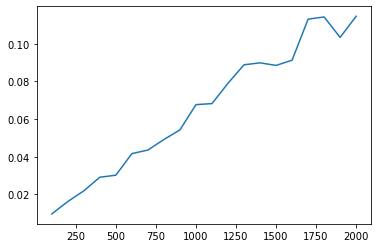

In [5]:
without_tasks_df.iloc[:, 1].plot.line()

In [6]:
average_time_list: list[pd.Series] = [without_tasks_df.iloc[:, 1], with_tasks_df.iloc[:, 1], with_instances_df.iloc[:, 1], with_pmse_df.iloc[:, 1]]
lstm_columns: list[str] = ['Simple LSTM', 'Task LSTM', 'Instance LSTM', 'Penalty LSTM']

average_df: pd.DataFrame = pd.concat(
    objs=average_time_list, 
    keys=lstm_columns, 
    axis=1)

average_df

,Simple LSTM,Task LSTM,Instance LSTM,Penalty LSTM
100,0.009691,0.009126,0.016284,0.010067
200,0.016266,0.018393,0.016836,0.016266
300,0.021945,0.024665,0.023966,0.024146
400,0.029156,0.031026,0.033269,0.031569
500,0.030238,0.031664,0.034102,0.030535
600,0.041694,0.040291,0.042854,0.044026
700,0.043587,0.047580,0.045808,0.043956
800,0.049169,0.044563,0.054588,0.056120
900,0.054265,0.061497,0.061520,0.057666
1000,0.067673,0.072539,0.066816,0.068682


In [32]:
print(average_df.describe().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simple LSTM &  Task LSTM &  Instance LSTM &  Penalty LSTM \\
\midrule
count &    20.000000 &  20.000000 &      20.000000 &     20.000000 \\
mean  &     0.065724 &   0.066120 &       0.067292 &      0.067271 \\
std   &     0.034361 &   0.033345 &       0.033334 &      0.034054 \\
min   &     0.009691 &   0.009126 &       0.016284 &      0.010067 \\
25\%   &     0.038830 &   0.038134 &       0.040666 &      0.040859 \\
50\%   &     0.067952 &   0.071975 &       0.069528 &      0.072753 \\
75\%   &     0.090200 &   0.092927 &       0.088707 &      0.089668 \\
max   &     0.114571 &   0.114148 &       0.120081 &      0.114867 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_89127/2878879757.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(average_df.describe().to_latex())


In [27]:
batch_sizes: list = average_df.index.values.tolist()
batch_sizes = [batch for batch in range(batch_sizes[0], batch_sizes[-1] + 1, batch_sizes[1])]
batch_sizes = [x for x in range(0, 2001, 250)]
batch_sizes[0] = 100
batch_sizes

[100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

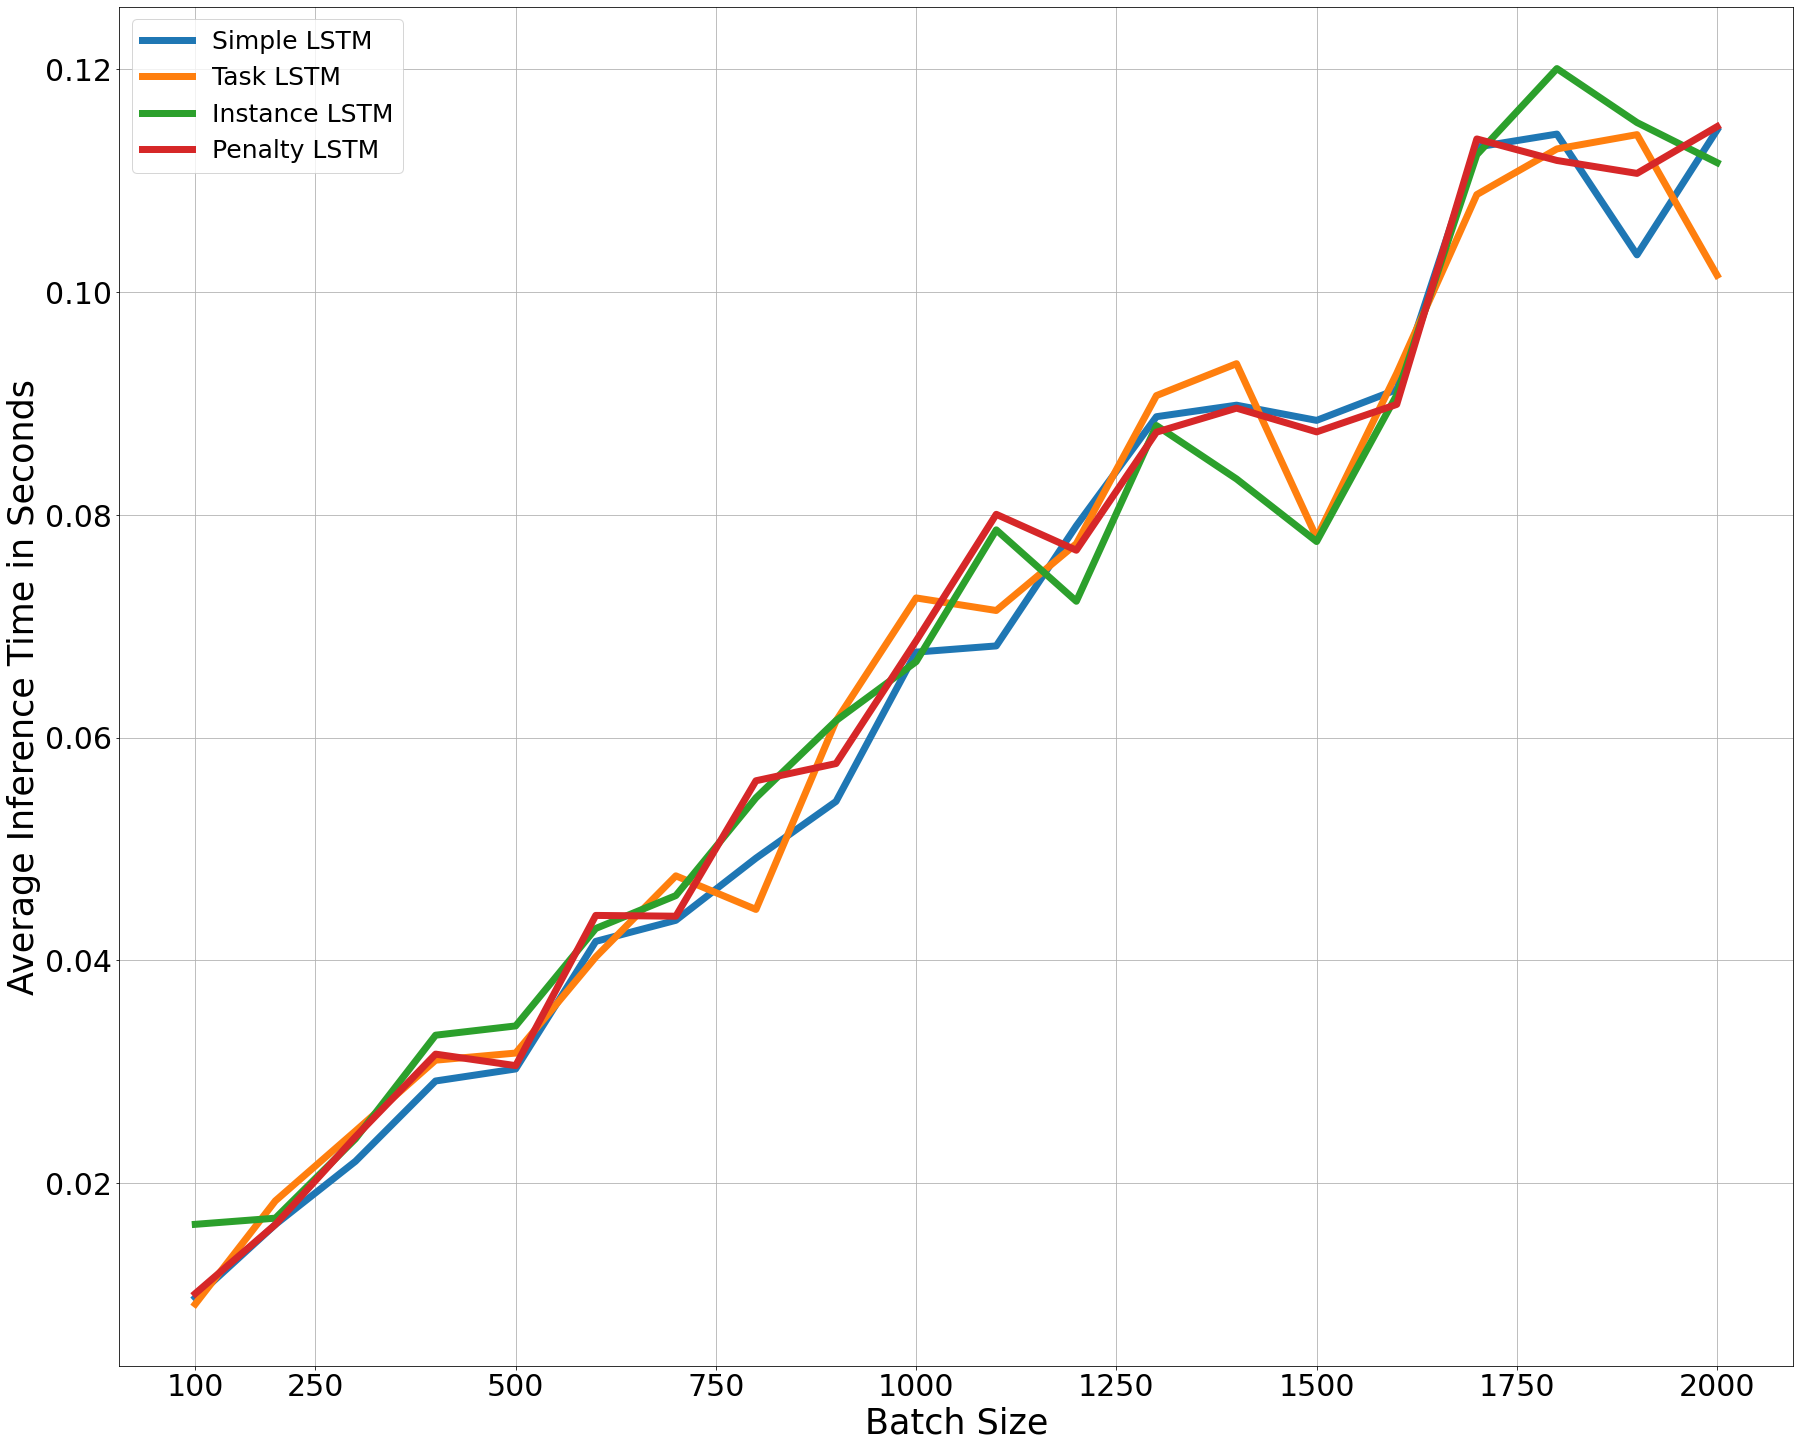

In [29]:
average_df.plot(
    figsize=(30, 25), 
    linewidth=7
    )
plt.xlabel('Batch Size', fontsize=35)
plt.xticks(ticks=batch_sizes, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Average Inference Time in Seconds', fontsize=35)
# plt.title('Average Inference Time per Batch Size', fontsize=40)
plt.legend(fontsize=25)
plt.grid()
plt.show()

,Simple LSTM,Task LSTM,Instance LSTM,Penalty LSTM
100,0.009691,0.009126,0.016284,0.010067
200,0.016266,0.018393,0.016836,0.016266
300,0.021945,0.024665,0.023966,0.024146
400,0.029156,0.031026,0.033269,0.031569
500,0.030238,0.031664,0.034102,0.030535
600,0.041694,0.040291,0.042854,0.044026
700,0.043587,0.047580,0.045808,0.043956
800,0.049169,0.044563,0.054588,0.056120
900,0.054265,0.061497,0.061520,0.057666
1000,0.067673,0.072539,0.066816,0.068682


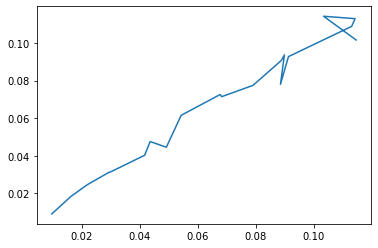

In [ ]:
plt.plot(average_df.iloc[:, 0], average_df.iloc[:, 1])